# **Integrantes**
*  # Jennyfer Belalcazar Manrique
*  # Diego Ledesma Motta
*  # José David Barona



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Class definition**


In [70]:
class pointsGenerator:
    
    def line(self, x1, y1, x2, y2, method):
        if method == 'bresenham':
            #Conditions:
            # * x1 < x2 and y1 < y2
            # * 0 < m < 1
            if (x1 > x2) or (y1 > y2) or ( (y2-y1)/(x2-x1) > 1) or ( (y2-y1)/(x2-x1) < 0):
                print("first if statement")
                raise ValueError('Invalid points for Bresenham algorithm')
            m = 2 * (y2-y1)     
            mErr = m - (x2-x1)  

            y = y1
            points = np.zeros((0,), dtype = np.int32)

            for x in range(x1, x2 + 1): 
                points = np.append(points, np.array([x, y], dtype = np.int32))
                mErr = mErr + m     
                if mErr >= 0:
                    y += 1          
                    mErr = mErr - 2 * (x2 - x1) 

            return points.reshape(-1, 2)

        if method == 'DDA':
            dx = abs(x2-x1)
            dy = abs(y2-y1)
            if(dx>dy):
                step = dx
            else:
                step = dy

            xinc = dx/step
            yinc = dy/step
            points = np.zeros((0,), dtype = np.int32)
            x = x1
            y = y1
            points = np.append(points, np.array([x, y], dtype = np.int32))
            for k in range(1,step+1):
                x = x+ xinc
                y = y+ yinc
                points = np.append(points, np.array([round(x),round(y)], dtype = np.int32))
            return points.reshape(-1, 2)



    def basicAlgorithm(self,x0,y0,x1,y1,method):
      if method == 'basicAlgorithm':
        m = (y1-y0)/(x1-x0)
        x = x0
        y = y0
        points = np.zeros((0,), dtype = np.int32)
        while(x<=x1):
          points = np.append(points, np.array([x,round(y)] ,dtype = np.int32))
          y+=m;
          x+=1
        return points.reshape(-1,2)



    def circle(self, x0, y0, r, method):
        if method == 'mid-point':
            x = r
            y = 0

            points = np.zeros((0,), dtype = np.int32)
            points = np.append(points, np.array([x0 + x, y0 + y], dtype = np.int32))
            print("first point:", points)

            if (r > 0):
                points = np.append(points, np.array([x0 + x, y0 - y], dtype = np.int32))
                points = np.append(points, np.array([x0 + y, y0 + x], dtype = np.int32))
                points = np.append(points, np.array([x0 - y, y0 + x], dtype = np.int32))

            p = 1 - r
            print("p = ", 1, " - ", r)
            print("p = ", p)

            iteration = 0

            while (x > y):
                iteration += 1 #debugging
                print("iteration:", iteration) 
                y += 1

                

                # Mid-point inside or on the perimeter
                if p <= 0:
                    print("p <= 0")
                    print("p = ",p, " + ", 2 * y, " + ", 1)
                    p = p + 2 * y + 1
                    print("p = ", p)
                    

                # Mid-point outside the perimeter
                else:
                    print("p > 0")
                    x -= 1
                    print("p = ", p, " + ", 2 * y, " - ", 2 * x, " + ", 1)
                    p = p + 2 * y - 2 * x + 1
                    print("p = ", p)

                #print("p = ", p)

                # All the perimeter points have already been printed
                if (x < y):
                    break

                # adding the generated point and its reflections
                points = np.append(points, np.array([x0 + x, y0 + y], dtype = np.int32))
                print("next point: ", points[-2:])
                points = np.append(points, np.array([x0 - x, y0 + y], dtype = np.int32))
                points = np.append(points, np.array([x0 + x, y0 - y], dtype = np.int32))
                points = np.append(points, np.array([x0 - x, y0 - y], dtype = np.int32))

                # If the generated point is on the line x = y then 
                # the perimeter points have already been added
                if (x != y):
                    points = np.append(points, np.array([x0 + y, y0 + x], dtype = np.int32))
                    #print("next point: ", points[-2:])
                    points = np.append(points, np.array([x0 - y, y0 + x], dtype = np.int32))
                    points = np.append(points, np.array([x0 + y, y0 - x], dtype = np.int32))
                    points = np.append(points, np.array([x0 - y, y0 - x], dtype = np.int32))
                
            return points.reshape(-1, 2)

# **Tests**

# **Bresenham's Line Algorithm**

In [4]:
arr0 = np.append(np.zeros((1,1), dtype = np.int32 ), np.array([3,2], dtype = np.int32))
arr1 = np.append(arr0, np.array([5,4], dtype = np.int32))
print(arr1)

[0 3 2 5 4]


In [5]:
plotter = pointsGenerator()
plotter.line(0,0,3,2, 'bresenham')

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]], dtype=int32)

In [6]:
plotter.line(3,2,15,5, 'bresenham')

array([[ 3,  2],
       [ 4,  3],
       [ 5,  3],
       [ 6,  3],
       [ 7,  3],
       [ 8,  4],
       [ 9,  4],
       [10,  4],
       [11,  4],
       [12,  5],
       [13,  5],
       [14,  5],
       [15,  5]], dtype=int32)

# **DDA Line**

In [57]:
plotter = pointsGenerator()
arr = plotter.line(3,4,7,9, 'DDA')
arr

array([[3, 4],
       [4, 5],
       [5, 6],
       [5, 7],
       [6, 8],
       [7, 9]], dtype=int32)

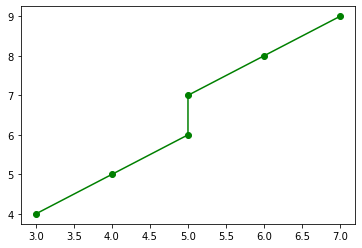

In [8]:
xList = []
yList = []

for i in range(round(arr.size/2)):
    xList.append(arr[i][0])
    yList.append(arr[i][1])


plt.plot(xList, yList, color='green',marker='o')
plt.show()

# **mid-point circle drawing algorithm**

In [9]:
pointsGen = pointsGenerator()
pointsGen.circle(0,0,3, 'mid-point')

first point: [3 0]
p =  1  -  3
p =  -2
iteration: 1
p <= 0
p =  -2  +  2  +  1
p =  1
next point:  [3 1]
iteration: 2
p > 0
p =  1  +  4  -  4  +  1
p =  2
next point:  [2 2]


array([[ 3,  0],
       [ 3,  0],
       [ 0,  3],
       [ 0,  3],
       [ 3,  1],
       [-3,  1],
       [ 3, -1],
       [-3, -1],
       [ 1,  3],
       [-1,  3],
       [ 1, -3],
       [-1, -3],
       [ 2,  2],
       [-2,  2],
       [ 2, -2],
       [-2, -2]], dtype=int32)

In [116]:
pointsGen.circle(-2,-3,8, 'mid-point')

first point: [ 6 -3]
p =  1  -  8
p =  -7
iteration: 1
p <= 0
p =  -7  +  2  +  1
p =  -4
next point:  [ 6 -2]
iteration: 2
p <= 0
p =  -4  +  4  +  1
p =  1
next point:  [ 6 -1]
iteration: 3
p > 0
p =  1  +  6  -  14  +  1
p =  -6
next point:  [5 0]
iteration: 4
p <= 0
p =  -6  +  8  +  1
p =  3
next point:  [5 1]
iteration: 5
p > 0
p =  3  +  10  -  12  +  1
p =  2
next point:  [4 2]
iteration: 6
p > 0
p =  2  +  12  -  10  +  1
p =  5


array([[  6,  -3],
       [  6,  -3],
       [ -2,   5],
       [ -2,   5],
       [  6,  -2],
       [-10,  -2],
       [  6,  -4],
       [-10,  -4],
       [ -1,   5],
       [ -3,   5],
       [ -1, -11],
       [ -3, -11],
       [  6,  -1],
       [-10,  -1],
       [  6,  -5],
       [-10,  -5],
       [  0,   5],
       [ -4,   5],
       [  0, -11],
       [ -4, -11],
       [  5,   0],
       [ -9,   0],
       [  5,  -6],
       [ -9,  -6],
       [  1,   4],
       [ -5,   4],
       [  1, -10],
       [ -5, -10],
       [  5,   1],
       [ -9,   1],
       [  5,  -7],
       [ -9,  -7],
       [  2,   4],
       [ -6,   4],
       [  2, -10],
       [ -6, -10],
       [  4,   2],
       [ -8,   2],
       [  4,  -8],
       [ -8,  -8],
       [  3,   3],
       [ -7,   3],
       [  3,  -9],
       [ -7,  -9]], dtype=int32)

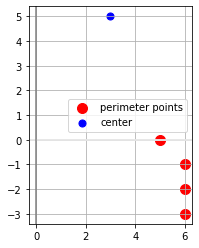

In [130]:
firstOctPoints = np.array([[6,-3], [6,-2], [6,-1], [5,0]])

fig,  ax = plt.subplots()
#ax.spines['top'].set_position(('data',15))
#ax.spines['left'].set_position(('data',0))
ax.scatter(firstOctPoints[:,0], firstOctPoints[:,1], s = 100, color = 'red', label = 'perimeter points')
ax.scatter([3], [5], s = 50, color = 'blue', label = 'center')
plt.grid()
ax.set_aspect('equal')
ax.axhline(y=0, color='gray')
ax.axhline(y = 0, color = 'white')
ax.axvline(x=0, color='gray')
plt.legend()
plt.show()

[[ 9 18]
 [10 21]
 [11 23]
 [12 26]]


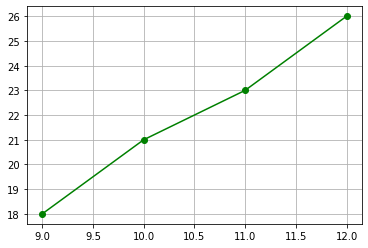

In [111]:
pointsGen = pointsGenerator()
points = pointsGen.basicAlgorithm(9,18,12,26,'basicAlgorithm')
print(points)
plt.grid()
plt.plot(points[:,0],points[:,1], color='green',marker='o',)
plt.show()
